# Traffic Light Detection and Classification - Udacity CarND Capstone
Using pre-trained models to detect objects in an image. The code is based on the [jupyter notebook in this repository](https://github.com/coldKnight/TrafficLight_Detection-TensorFlowAPI)

### Requirements

Install environment with [Anaconda](https://www.continuum.io/downloads):

```sh
conda env create -f environment.yml
```

In evironment.yml, change TensorFlow pip installation from `tensorflow-gpu` to `tensorflow` if you don't have a GPU available.

Activate environment

```sh
activate tensorflow-1.3
```

In [1]:
import numpy as np
import os
import tensorflow as tf
import time
from matplotlib import pyplot as plt
from PIL import Image
from glob import glob
%matplotlib inline

In [2]:
from utils import label_map_util
from utils import visualization_utils as vis_util

In [3]:
# Size, in inches, of the output images.
IMAGE_SIZE = (8, 5)

#get image paths from directory
def get_image_paths(PATH_TO_TEST_IMAGES_DIR):
    print(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
    image_paths = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
    print("Length of test images:", len(image_paths))
    return image_paths

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

def load_graph(model_path):
    detection_graph = tf.Graph()
    with detection_graph.as_default():
      od_graph_def = tf.GraphDef()
      with tf.gfile.GFile(model_path, 'rb') as fid:

        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
    return detection_graph

def run_detection(detection_graph, image_paths, fx, fy, img_width, img_height):
    with detection_graph.as_default():
        with tf.Session(graph=detection_graph) as sess:

            # Definite input and output Tensors for detection_graph
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

            # Each box represents a part of the image where a particular object was detected.
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')

            for image_path in image_paths:
                image = Image.open(image_path)
                # the array based representation of the image will be used later in order to prepare the
                # result image with boxes and labels on it.
                image_np = load_image_into_numpy_array(image)
                # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
                image_np_expanded = np.expand_dims(image_np, axis=0)

                time0 = time.time()
                # Actual detection.
                (boxes, scores, classes, num) = sess.run(
                  [detection_boxes, detection_scores, detection_classes, num_detections],
                  feed_dict={image_tensor: image_np_expanded})

                time1 = time.time()

                boxes = np.squeeze(boxes)
                scores = np.squeeze(scores)
                classes = np.squeeze(classes).astype(np.int32)

                # Visualization of the results of a detection.
                vis_util.visualize_boxes_and_labels_on_image_array(
                    image_np, boxes, classes, scores,
                    category_index,
                    use_normalized_coordinates=True,
                    line_thickness=6)

                plt.figure(figsize=IMAGE_SIZE)
                plt.imshow(image_np)
                plt.show()
                print(image_path,"\n")

                min_score_thresh = .50
                for i in range(boxes.shape[0]):
                    if scores is None or scores[i] > min_score_thresh:

                        class_name = category_index[classes[i]]['name']
                        print('{}'.format(class_name), scores[i])

                        perceived_width_x = (boxes[i][3] - boxes[i][1]) * img_width
                        perceived_width_y = (boxes[i][2] - boxes[i][0]) * img_height

                        # ymin, xmin, ymax, xmax = box
                        # depth_prime = (width_real * focal) / perceived_width
                        perceived_depth_x = ((.1 * fx) / perceived_width_x)
                        perceived_depth_y = ((.3 * fy) / perceived_width_y )

                        estimated_distance = round((perceived_depth_x + perceived_depth_y) / 2)
                        print("Distance (metres)", estimated_distance)
                        print("Time in milliseconds", (time1 - time0) * 1000, "\n") 

## Test images paths

In [4]:
TEST_IMAGE_PATHS_SIM  = get_image_paths('test_images_sim')
TEST_IMAGE_PATHS_REAL = get_image_paths('test_images_udacity')

test_images_sim\*.jpg
Length of test images: 12
test_images_udacity\*.jpg
Length of test images: 9


## Model paths

In [15]:
ssd_mobile_sim_model = 'frozen_sim_mobile-5000/frozen_inference_graph.pb'
ssd_mobile_real_model = 'frozen_real_mobile-5000/frozen_inference_graph.pb'
ssd_inception_sim_model = 'frozen_sim_inception-5000/frozen_inference_graph.pb'
ssd_inception_real_model = 'frozen_real_inception-5000/frozen_inference_graph.pb'

## Loading label map

Label maps map indices to category names, so that when our convolution network predicts 2, we know that this corresponds to Red. Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine.

In [6]:
PATH_TO_LABELS = 'label_map.pbtxt'
NUM_CLASSES = 4

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


## Detection

## 1. Testing SSD Mobile Models

### 1.1 Testing model trained on simulator on simulator images

In [7]:
detection_graph = load_graph(ssd_mobile_sim_model)

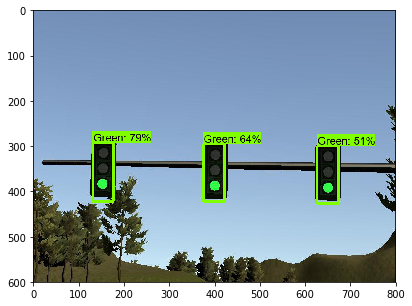

test_images_sim\left0003.jpg 

Green 0.7981602
Distance (metres) 3.0
Time in milliseconds 3944.804906845093 

Green 0.6463811
Distance (metres) 3.0
Time in milliseconds 3944.804906845093 

Green 0.51195025
Distance (metres) 3.0
Time in milliseconds 3944.804906845093 



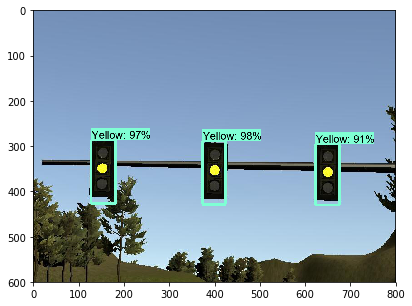

test_images_sim\left0011.jpg 

Yellow 0.9807859
Distance (metres) 3.0
Time in milliseconds 50.0340461730957 

Yellow 0.97784185
Distance (metres) 3.0
Time in milliseconds 50.0340461730957 

Yellow 0.9100041
Distance (metres) 3.0
Time in milliseconds 50.0340461730957 



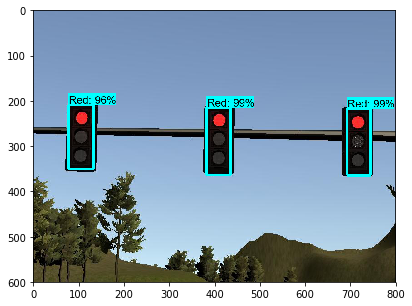

test_images_sim\left0027.jpg 

Red 0.9916579
Distance (metres) 3.0
Time in milliseconds 47.03259468078613 

Red 0.99118805
Distance (metres) 3.0
Time in milliseconds 47.03259468078613 

Red 0.96292114
Distance (metres) 3.0
Time in milliseconds 47.03259468078613 



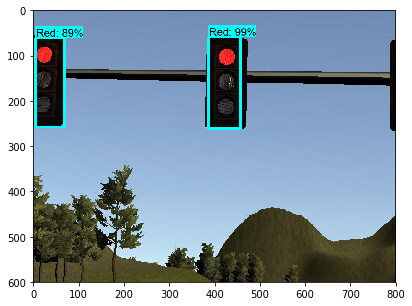

test_images_sim\left0034.jpg 

Red 0.9941596
Distance (metres) 2.0
Time in milliseconds 48.03276062011719 

Red 0.8995471
Distance (metres) 2.0
Time in milliseconds 48.03276062011719 



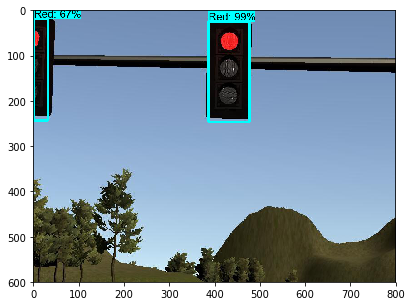

test_images_sim\left0036.jpg 

Red 0.9974517
Distance (metres) 2.0
Time in milliseconds 48.03347587585449 

Red 0.6775965
Distance (metres) 3.0
Time in milliseconds 48.03347587585449 



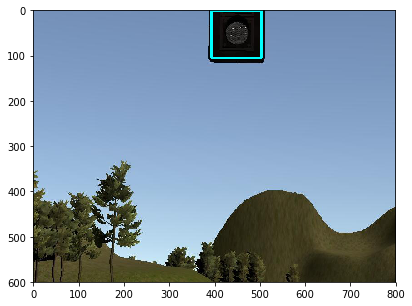

test_images_sim\left0040.jpg 

Red 0.9882429
Distance (metres) 3.0
Time in milliseconds 48.03323745727539 



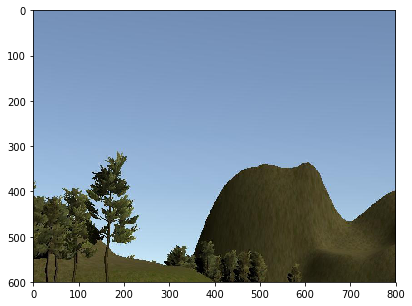

test_images_sim\left0048.jpg 



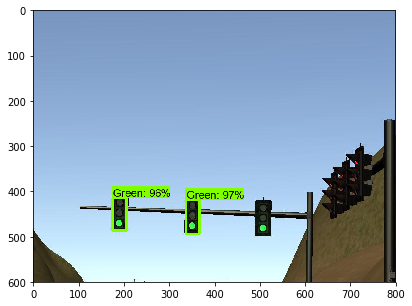

test_images_sim\left0545.jpg 

Green 0.97899836
Distance (metres) 5.0
Time in milliseconds 47.03187942504883 

Green 0.96037656
Distance (metres) 5.0
Time in milliseconds 47.03187942504883 



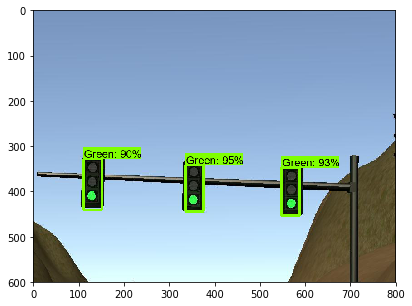

test_images_sim\left0560.jpg 

Green 0.9596344
Distance (metres) 4.0
Time in milliseconds 46.03171348571777 

Green 0.9384158
Distance (metres) 4.0
Time in milliseconds 46.03171348571777 

Green 0.90922284
Distance (metres) 3.0
Time in milliseconds 46.03171348571777 



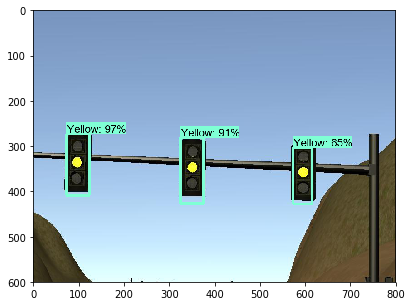

test_images_sim\left0588.jpg 

Yellow 0.9731407
Distance (metres) 3.0
Time in milliseconds 48.033714294433594 

Yellow 0.91248465
Distance (metres) 3.0
Time in milliseconds 48.033714294433594 

Yellow 0.65719503
Distance (metres) 3.0
Time in milliseconds 48.033714294433594 



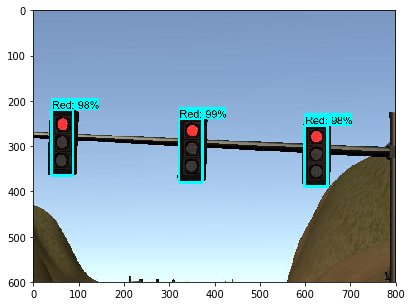

test_images_sim\left0606.jpg 

Red 0.99536705
Distance (metres) 3.0
Time in milliseconds 48.03323745727539 

Red 0.98736644
Distance (metres) 3.0
Time in milliseconds 48.03323745727539 

Red 0.98453796
Distance (metres) 3.0
Time in milliseconds 48.03323745727539 



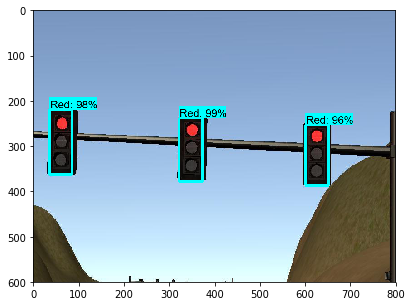

test_images_sim\left0607.jpg 

Red 0.99696475
Distance (metres) 3.0
Time in milliseconds 46.031951904296875 

Red 0.98530585
Distance (metres) 3.0
Time in milliseconds 46.031951904296875 

Red 0.9660972
Distance (metres) 3.0
Time in milliseconds 46.031951904296875 



In [8]:
run_detection(detection_graph, TEST_IMAGE_PATHS_SIM, 1345.200806, 1353.838257, 800, 600)

### 1.2 Testing model trained on real images on Real World images

In [9]:
detection_graph = load_graph(ssd_mobile_real_model)

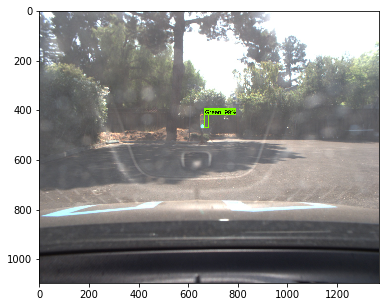

test_images_udacity\left0000.jpg 

Green 0.998041
Distance (metres) 8.0
Time in milliseconds 970.6897735595703 



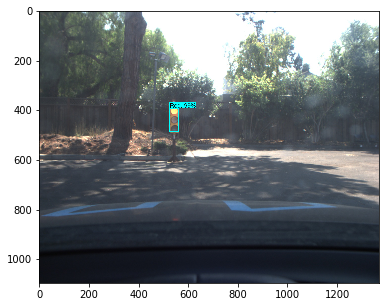

test_images_udacity\left0140.jpg 

Red 0.999468
Distance (metres) 4.0
Time in milliseconds 95.06845474243164 



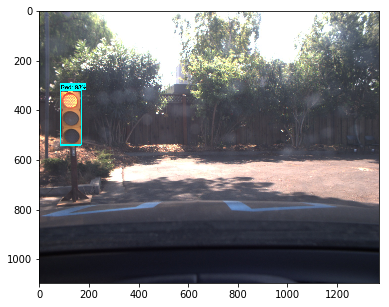

test_images_udacity\left0183.jpg 

Red 0.9890261
Distance (metres) 2.0
Time in milliseconds 54.03876304626465 



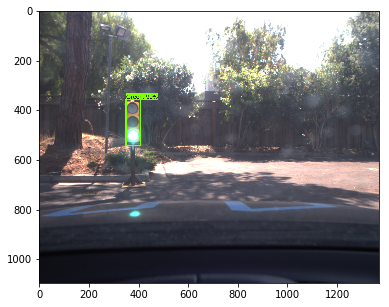

test_images_udacity\left0282.jpg 

Green 0.9996171
Distance (metres) 2.0
Time in milliseconds 86.06123924255371 



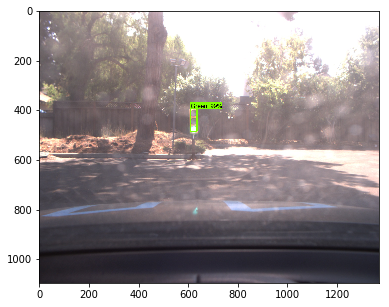

test_images_udacity\left0358.jpg 

Green 0.99997485
Distance (metres) 5.0
Time in milliseconds 85.06155014038086 



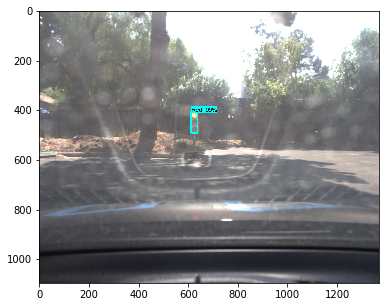

test_images_udacity\left0528.jpg 

Red 0.99967575
Distance (metres) 5.0
Time in milliseconds 83.05931091308594 



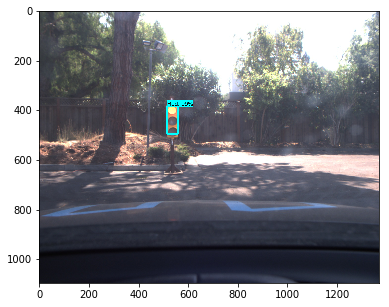

test_images_udacity\left0561.jpg 

Red 0.99971384
Distance (metres) 3.0
Time in milliseconds 87.06092834472656 



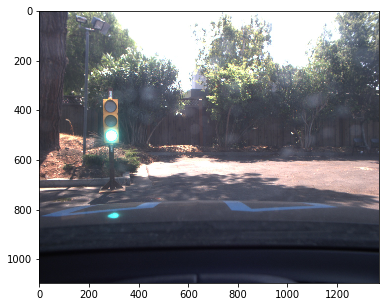

test_images_udacity\left0681.jpg 



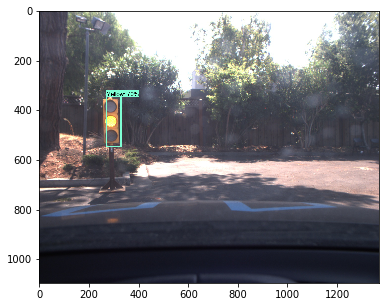

test_images_udacity\left0701.jpg 

Yellow 0.70268387
Distance (metres) 2.0
Time in milliseconds 86.06195449829102 



In [10]:
run_detection(detection_graph, TEST_IMAGE_PATHS_REAL, 1345.200806, 1353.838257, 1368, 1096)

## 2. Testing SSD Inception Models

### 2.1 Testing model trained on simulator on simulator images

### 2.1 Testing model trained on simulator on simulator images

In [11]:
detection_graph = load_graph(ssd_inception_sim_model)

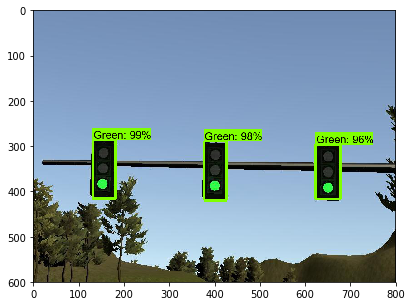

test_images_sim\left0003.jpg 

Green 0.992964
Distance (metres) 3.0
Time in milliseconds 5638.635158538818 

Green 0.9818024
Distance (metres) 3.0
Time in milliseconds 5638.635158538818 

Green 0.96377325
Distance (metres) 3.0
Time in milliseconds 5638.635158538818 



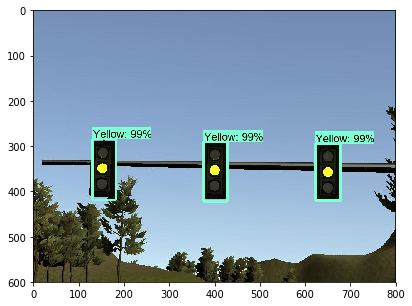

test_images_sim\left0011.jpg 

Yellow 0.99685574
Distance (metres) 3.0
Time in milliseconds 125.08988380432129 

Yellow 0.99615234
Distance (metres) 3.0
Time in milliseconds 125.08988380432129 

Yellow 0.9957223
Distance (metres) 3.0
Time in milliseconds 125.08988380432129 



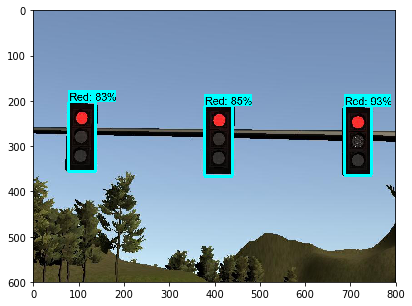

test_images_sim\left0027.jpg 

Red 0.9337915
Distance (metres) 2.0
Time in milliseconds 115.081787109375 

Red 0.85300714
Distance (metres) 2.0
Time in milliseconds 115.081787109375 

Red 0.8346732
Distance (metres) 2.0
Time in milliseconds 115.081787109375 



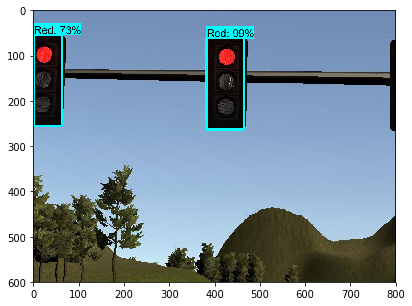

test_images_sim\left0034.jpg 

Red 0.9948513
Distance (metres) 2.0
Time in milliseconds 122.08127975463867 

Red 0.7317068
Distance (metres) 2.0
Time in milliseconds 122.08127975463867 



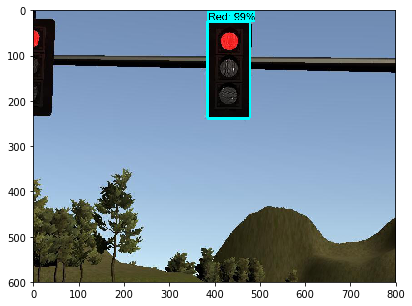

test_images_sim\left0036.jpg 

Red 0.9962655
Distance (metres) 2.0
Time in milliseconds 114.08209800720215 



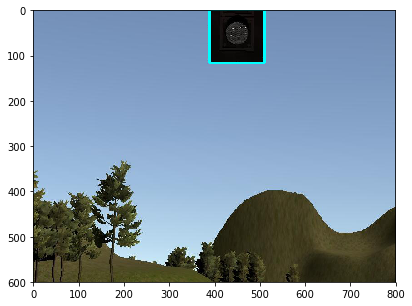

test_images_sim\left0040.jpg 

Red 0.97752553
Distance (metres) 2.0
Time in milliseconds 116.08409881591797 



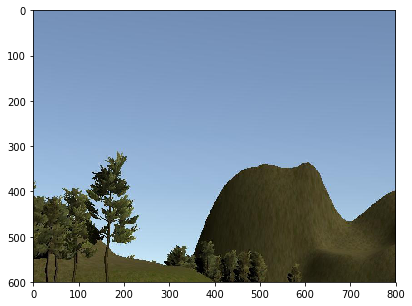

test_images_sim\left0048.jpg 



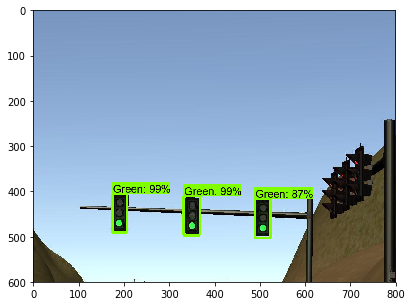

test_images_sim\left0545.jpg 

Green 0.9990024
Distance (metres) 4.0
Time in milliseconds 118.08371543884277 

Green 0.9989666
Distance (metres) 4.0
Time in milliseconds 118.08371543884277 

Green 0.8741852
Distance (metres) 4.0
Time in milliseconds 118.08371543884277 



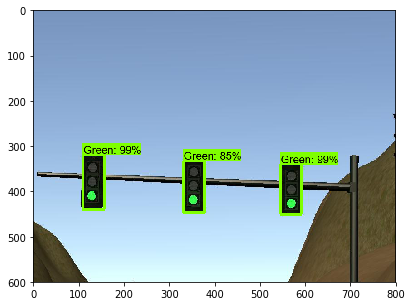

test_images_sim\left0560.jpg 

Green 0.9983512
Distance (metres) 3.0
Time in milliseconds 89.06269073486328 

Green 0.9976654
Distance (metres) 3.0
Time in milliseconds 89.06269073486328 

Green 0.8592437
Distance (metres) 3.0
Time in milliseconds 89.06269073486328 



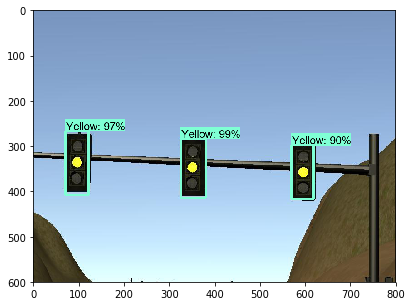

test_images_sim\left0588.jpg 

Yellow 0.99748516
Distance (metres) 3.0
Time in milliseconds 116.08147621154785 

Yellow 0.9762007
Distance (metres) 3.0
Time in milliseconds 116.08147621154785 

Yellow 0.90720904
Distance (metres) 3.0
Time in milliseconds 116.08147621154785 



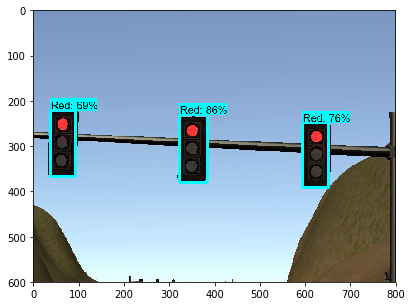

test_images_sim\left0606.jpg 

Red 0.866621
Distance (metres) 2.0
Time in milliseconds 116.08171463012695 

Red 0.7680044
Distance (metres) 3.0
Time in milliseconds 116.08171463012695 

Red 0.6981982
Distance (metres) 3.0
Time in milliseconds 116.08171463012695 



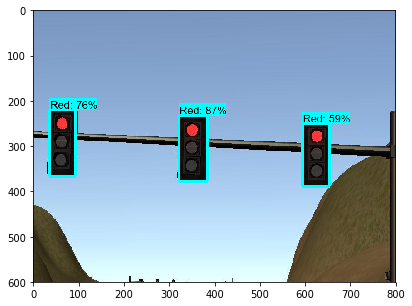

test_images_sim\left0607.jpg 

Red 0.8751476
Distance (metres) 2.0
Time in milliseconds 114.08138275146484 

Red 0.7608739
Distance (metres) 3.0
Time in milliseconds 114.08138275146484 

Red 0.5933274
Distance (metres) 3.0
Time in milliseconds 114.08138275146484 



In [12]:
run_detection(detection_graph, TEST_IMAGE_PATHS_SIM, 1345.200806, 1353.838257, 800, 600)

### 2.2 Testing model trained on real images on Real World images

In [16]:
detection_graph = load_graph(ssd_inception_real_model)

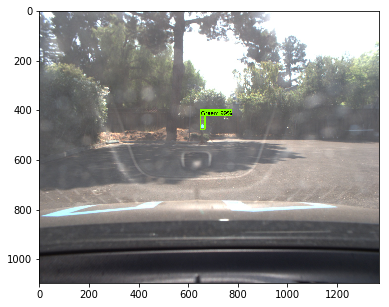

test_images_udacity\left0000.jpg 

Green 0.9999188
Distance (metres) 7.0
Time in milliseconds 4232.24139213562 



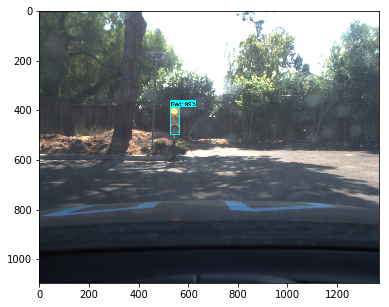

test_images_udacity\left0140.jpg 

Red 0.9987111
Distance (metres) 4.0
Time in milliseconds 123.14414978027344 



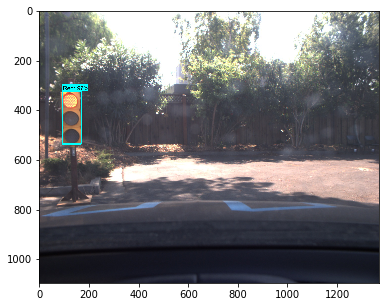

test_images_udacity\left0183.jpg 

Red 0.9767354
Distance (metres) 2.0
Time in milliseconds 121.08516693115234 



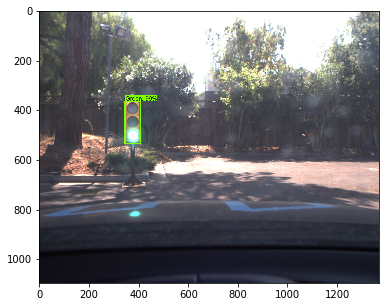

test_images_udacity\left0282.jpg 

Green 0.9952596
Distance (metres) 2.0
Time in milliseconds 123.08406829833984 



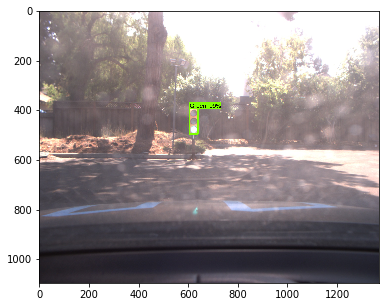

test_images_udacity\left0358.jpg 

Green 0.998572
Distance (metres) 4.0
Time in milliseconds 124.09043312072754 



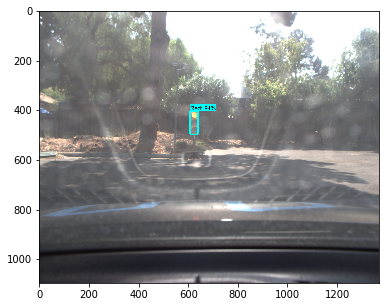

test_images_udacity\left0528.jpg 

Red 0.94459784
Distance (metres) 4.0
Time in milliseconds 121.08707427978516 



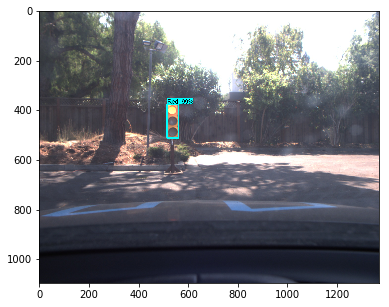

test_images_udacity\left0561.jpg 

Red 0.99340034
Distance (metres) 3.0
Time in milliseconds 122.08771705627441 



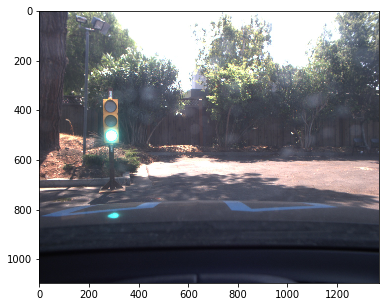

test_images_udacity\left0681.jpg 



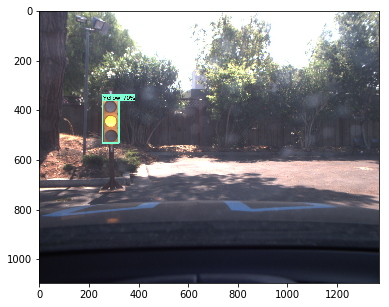

test_images_udacity\left0701.jpg 

Yellow 0.7093718
Distance (metres) 2.0
Time in milliseconds 126.09457969665527 



In [17]:
run_detection(detection_graph, TEST_IMAGE_PATHS_REAL, 1345.200806, 1353.838257, 1368, 1096)